In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
address_url = "C:/Users/abhil/Desktop/Python/DataSet/hi.csv"
address = pd.read_csv(address_url)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
address.head(15)

,LON,LAT,NUMBER,STREET,UNIT,CITY,DISTRICT,REGION,POSTCODE,ID,HASH
0,-157.833127,21.300769,1625,CLARK ST HNL,NaN,HONOLULU,NaN,NaN,NaN,NaN,9b3cf2c890fa7e9d
1,-157.721942,21.289418,6152,KAWEKIU PL,NaN,NaN,NaN,NaN,NaN,NaN,6fa5d983b1a4dead
2,-157.722200,21.288880,6141,KAWEKIU PL,NaN,NaN,NaN,NaN,NaN,NaN,9ec61a48b879f0f3
3,-157.722751,21.290175,354,DALENE WAY,NaN,NaN,NaN,NaN,NaN,NaN,30b9cf496ad7d6e8
4,-157.724095,21.370414,1477,HUMUWILI PL,NaN,NaN,NaN,NaN,NaN,NaN,9da8e82c2d0508f6
5,-157.723510,21.369894,1486,HUMUWILI PL,NaN,NaN,NaN,NaN,NaN,NaN,3c07602f227355a1
6,-157.723346,21.370603,1469,HUMUULA ST,NaN,NaN,NaN,NaN,NaN,NaN,d0b56f55c1106112
7,-157.722639,21.369971,1499,HUMUULA ST,NaN,NaN,NaN,NaN,NaN,NaN,0dcae1322c0e5a85
8,-157.723396,21.369216,1428,ONIONI ST,NaN,NaN,NaN,NaN,NaN,NaN,62c880d4437ae984
9,-157.722406,21.369498,1460,ONIONI ST,NaN,NaN,NaN,NaN,NaN,NaN,cf2feebb7a6f6221


In [4]:
address.describe()

,LON,LAT,DISTRICT,POSTCODE,ID
count,274328.000000,274328.000000,0.0,41381.000000,0.0
mean,-157.839287,21.361650,NaN,85727.105942,NaN
std,0.772911,0.307495,NaN,31104.728379,NaN
min,-160.540175,20.579725,NaN,0.000000,NaN
25%,-158.023225,21.291784,NaN,96732.000000,NaN
50%,-157.865663,21.353444,NaN,96761.000000,NaN
75%,-157.753594,21.429002,NaN,96790.000000,NaN
max,-155.977398,22.234519,NaN,996732.000000,NaN


In [5]:
print(address.columns.values)

['LON' 'LAT' 'NUMBER' 'STREET' 'UNIT' 'CITY' 'DISTRICT' 'REGION'
 'POSTCODE' 'ID' 'HASH']


In [6]:
address.isna().head()

,LON,LAT,NUMBER,STREET,UNIT,CITY,DISTRICT,REGION,POSTCODE,ID,HASH
0,False,False,False,False,True,False,True,True,True,True,False
1,False,False,False,False,True,True,True,True,True,True,False
2,False,False,False,False,True,True,True,True,True,True,False
3,False,False,False,False,True,True,True,True,True,True,False
4,False,False,False,False,True,True,True,True,True,True,False


In [7]:
print(address.isna().sum())

LON              0
LAT              0
NUMBER       15043
STREET       22188
UNIT        250255
CITY        234115
DISTRICT    274328
REGION      203525
POSTCODE    232947
ID          274328
HASH             0
dtype: int64


In [8]:
address = address.drop(['NUMBER','STREET', 'UNIT','CITY', 'DISTRICT', 'REGION', 'POSTCODE', 'ID', 'HASH'], axis=1)

export_csv = address.to_csv(r'C:\Users\abhil\Desktop\Python\DataSet\address2.csv', index = None, header=True)

In [9]:
address.mean()

LON   -157.839287
LAT     21.361650
dtype: float64

In [10]:
address.info

<bound method DataFrame.info of                LON        LAT
0      -157.833127  21.300769
1      -157.721942  21.289418
2      -157.722200  21.288880
3      -157.722751  21.290175
4      -157.724095  21.370414
5      -157.723510  21.369894
6      -157.723346  21.370603
7      -157.722639  21.369971
8      -157.723396  21.369216
9      -157.722406  21.369498
10     -158.182491  21.438742
11     -157.724064  21.394007
12     -157.724005  21.394350
13     -158.102806  21.591837
14     -157.923679  21.648576
15     -158.032432  21.404083
16     -157.857496  21.481120
17     -157.747145  21.402566
18     -157.852518  21.482457
19     -158.039513  21.644256
20     -157.871313  21.309920
21     -158.060083  21.333681
22     -157.987772  21.388771
23     -158.029405  21.403142
24     -157.827798  21.346220
25     -158.029075  21.685753
26     -157.855710  21.333927
27     -158.038295  21.521637
28     -157.861784  21.348267
29     -157.900835  21.374691
...            ...        ...
274298 -

In [11]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array(address)
kmeans = KMeans(n_clusters=10,).fit(X)


In [14]:
clust_centers = kmeans.cluster_centers_

In [11]:
kmeans.labels_

array([1, 9, 9, ..., 7, 2, 2])

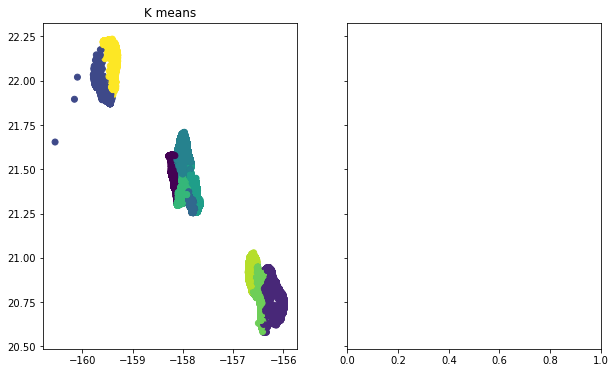

In [32]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,6))
ax1.set_title("K means")
ax1.scatter(address['LON'],address['LAT'], c = kmeans.labels_)


In [30]:
kmeans.labels_.

ValueError: itemset must have at least one argument

In [13]:
kmeans.cluster_centers_[2]

array([-156.54295542,   20.89514935])

In [21]:
for i in range(len(kmeans.cluster_centers_)):
    print(kmeans.cluster_centers_[i])


[-159.37698988   22.08495264]
[-157.82741232   21.30694942]
[-156.54295542   20.89514935]
[-158.00915687   21.53849399]
[-157.99935898   21.37863374]
[-159.56020689   21.92755484]
[-156.05478361   20.74905005]
[-156.36169223   20.80688097]
[-158.17155891   21.42832332]
[-157.75390329   21.37407963]


for i in range(kmeans.cluster_centers_):
    for j in range(len(address)):
        print(address)

In [34]:
LongLatCount = [
    [[0,0],0],
    [[0,0],0],
    [[0,0],0],
    [[0,0],0],
    [[0,0],0],
    [[0,0],0],
    [[0,0],0],
    [[0,0],0],
    [[0,0],0],
    [[0,5],0]
]
LongLatCount[9][1]

0

In [36]:
for i in range(len(kmeans.cluster_centers_)):
    LongLatCount[i][0][0] = round(kmeans.cluster_centers_[i][0],2)
    LongLatCount[i][0][1] = round(kmeans.cluster_centers_[i][1],2)
    for j in range(len(address)):
        if round(address['LON'][j],2)== LongLatCount[i][0][0] and round(address['LAT'][j],2)== LongLatCount[i][0][1]:
            LongLatCount[i][1] +=1
            
LongLatCount

[[[-159.38, 22.08], 74],
 [[-157.83, 21.31], 807],
 [[-156.54, 20.9], 0],
 [[-158.01, 21.54], 0],
 [[-158.0, 21.38], 495],
 [[-159.56, 21.93], 10],
 [[-156.05, 20.75], 0],
 [[-156.36, 20.81], 28],
 [[-158.17, 21.43], 98],
 [[-157.75, 21.37], 22]]

In [37]:
LongLatCount

[[[-159.38, 22.08], 74],
 [[-157.83, 21.31], 807],
 [[-156.54, 20.9], 0],
 [[-158.01, 21.54], 0],
 [[-158.0, 21.38], 495],
 [[-159.56, 21.93], 10],
 [[-156.05, 20.75], 0],
 [[-156.36, 20.81], 28],
 [[-158.17, 21.43], 98],
 [[-157.75, 21.37], 22]]

In [4]:
type(address)

pandas.core.frame.DataFrame